<a href="https://colab.research.google.com/github/rafaelfabri/Sistemas-de-Informacao/blob/main/Um_Modelo_de_Aprendizado_de_M%C3%A1quina_para_Previs%C3%A3o_de_Clientes_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Um Modelo de Aprendizado de Máquina para Previsão de Clientes Churn**

## **1. Importando bibliotecas e conjunto de dados**

In [ ]:
#importando bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#importando base de dados
df = pd.read_csv('https://www.dropbox.com/s/mahtoy42e2affj0/Telco-Customer-Churn.csv?dl=1')

## **2. Análise Exploratória**

In [ ]:
#Quantidade de linhas e colunas 
print('O conjunto de dados possui', df.shape[0], 'linhas')
print('O conjunto de dados possui', df.shape[1], 'colunas')

O conjunto de dados possui 7043 linhas
O conjunto de dados possui 21 colunas


In [ ]:
#5 primeiras linhas
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


A coluna customerID não tem nenhuma utilidade, pois apenas representa o ID do cliente.

In [ ]:
#apagando coluna customerID
df.drop(labels= 'customerID', axis = 1, inplace = True)

In [ ]:
#nova quantidade de linhas e colunas
print('O conjunto de dados possui', df.shape[0], 'linhas')
print('O conjunto de dados possui', df.shape[1], 'colunas')

O conjunto de dados possui 7043 linhas
O conjunto de dados possui 20 colunas


In [ ]:
#Verificando quantidade de valores únicos na base de dados
df.nunique()

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [ ]:
#Verificando o tipo de cada coluna no DataFrame
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Observa-se que a coluna *TotalCharges* é do tipo object (String - texto), porém essa variável é representada por números. 

É normal ocorrer atribuições de um tipo errado a uma coluna do DataFrame, isso pode ter ocorrido por alguns motivos, mais comum é que os números estejam separados por vírgula e o Python interpreta apenas pontos como separadosr decimais.

In [ ]:
#Fazer a conversão dos dados de texto para número
df['TotalCharges'] = pd.to_numeric(arg = df['TotalCharges'], errors='coerce', downcast='float')

In [ ]:
#Verificando o tipo de cada coluna no DataFrame
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float32
Churn                object
dtype: object

In [ ]:
#Verificando se há dados ausentes
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Existem 11 linhas com dados ausentes na coluna *TotalCharges*

In [ ]:
#Vendo 3 linhas onde os dados de TotalCharges é ausente 
df[df['TotalCharges'].isnull()].head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No


Verificando todas as colunas onde TotalChages é NaN, nota-se que a variável tenure (tempo de assinatura do cliente) é igual a zero. Portanto, o motivo dos dados serem ausentes é porque ainda não completou 1 mês de assinatura, assim ainda não tendo nenhum pagamento para ser contabilizado em TotalCharges.

In [ ]:
#Substituíndo dados ausentes em Total Charges por zero
df['TotalCharges'].fillna(0, inplace = True) 

In [ ]:
print('Quantidade de dados ausentes em TotalCharges =', df['TotalCharges'].isnull().sum())

Quantidade de dados ausentes em TotalCharges = 0


## **3. Machine Learning**

### **3.1 Pré-Processamento**

In [ ]:
#instalando scikit-plot
!pip install -q scikit-plot

In [ ]:
#importando bibliotecas de ML
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import confusion_matrix, classification_report
import scikitplot

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
#copinado base de dados para df_copy
df_copy = df.copy()

In [ ]:
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.850000,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.500000,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.150002,Yes


In [ ]:
#converventendo as variáveis categóricas do tipo string para tipo numérico(int)
lista_cat = []
for i in range(0, len(df_copy.dtypes), 1):
  if (df_copy.dtypes[i] == 'object'):
    lista_cat.append(df_copy.dtypes.keys()[i])

label = LabelEncoder()

for i in lista_cat:
  df_copy[i] = label.fit_transform(df_copy[i])

In [ ]:
df_copy.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.850000,0
1,3962,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.500000,0
2,2564,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.150002,1


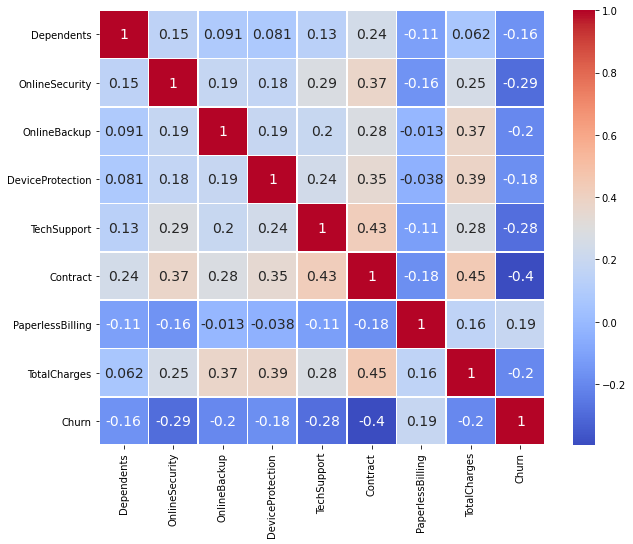

In [ ]:
#Verificando correlação entre o conjunto de dados

#Criando figura
fig, ax = plt.subplots(figsize=(10,8))

#Plotando gráfico
sns.heatmap(df_copy[['Dependents', 
                     	'OnlineSecurity',	'OnlineBackup',	'DeviceProtection',	'TechSupport',
                      'Contract', 'PaperlessBilling',	'TotalCharges', 'Churn'	]].corr(), 
            annot=True, fmt='.2g', linewidths=0.5, annot_kws={'size':14}, cmap = 'coolwarm')

#Salvando imagem
fig.savefig('filename.png', dpi=1800)

In [ ]:
#Separando em variáveis dependentes e independentes
X = df_copy.drop(labels = 'Churn', axis = 1)
y = df_copy['Churn']

In [ ]:
#Separando varariáveis em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state = 123)

In [ ]:
#Separando as variáveis em teste de validação e teste final
X_test_val, X_test_final, y_test_val, y_test_final = train_test_split(X_test, y_test, test_size = 0.5, stratify = y_test, random_state = 123)

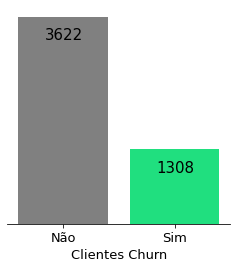

In [ ]:
#Plotando o Gráfico para Visualização
#Criando figura
fig, ax = plt.subplots(figsize=(4,4))

#Plotando gráfico
sns.countplot(x = y_train, ax = ax, palette = ['#808080', '#00FF7F'])

#Mudando nomes dos ticks
ax.set_xticklabels(labels = ['Não', 'Sim'], fontdict={'fontsize':13})

#Mudando nome do eixo
ax.set_ylabel('')
ax.set_xlabel('Clientes Churn', fontdict = {'fontsize':13})

#Retirando os ticks do eixo
ax.tick_params(labelleft = None, left = None)

#Apagando linhas do eixo
for axis in ['left', 'right','top']:
  ax.spines[axis].set_color(None)

#Atribuíndo legendas da quantidade de valores em cada barra
for i in range(0, len(df['Churn'].value_counts().values), 1):
  ax.text(x = i - 0.16, y = y_train.value_counts().values[i] - 400, s = str(y_train.value_counts().values[i]),
          size = 15)

#Salvando imagem
fig.savefig('img.png', dpi = 1200)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


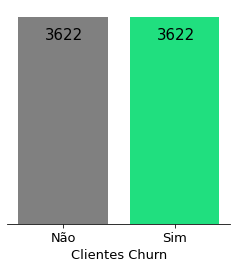

In [ ]:
#balanceando conjunto de dados - criando novas linhas com clientes churn
ros = RandomOverSampler()

#Ajuste para criação das novas variáveis
X_train_ros, y_train_ros = ros.fit_sample(X_train, y_train)

y_train_ros = pd.Series(y_train_ros)


#Plotando o Gráfico para Visualização
#Criando figura
fig, ax = plt.subplots(figsize=(4,4))

#Plotando gráfico
sns.countplot(x = y_train_ros, ax = ax, palette = ['#808080', '#00FF7F'])

#Mudando nomes dos ticks
ax.set_xticklabels(labels = ['Não', 'Sim'], fontdict = {'fontsize':13})

#Mudando nome do eixo
ax.set_ylabel('')
ax.set_xlabel('Clientes Churn', fontdict={'fontsize':13})

#Retirando os ticks do eixo
ax.tick_params(labelleft = None, left = None)

#Apagando linhas do eixo
for axis in ['left', 'right','top']:
  ax.spines[axis].set_color(None)

#Atribuíndo legendas da quantidade de valores em cada barra
for i in range(0, len(df['Churn'].value_counts().values), 1):
  ax.text(x = i - 0.16, y = y_train_ros.value_counts().values[i] - 400, s = str(y_train_ros.value_counts().values[i]),
          size = 15)

#Salvando imagem
fig.savefig('img1.png', dpi = 1200)

### **3.2 Treino e Teste do Modelo de Aprendizado de Máquina**

In [ ]:
#instanciando o modeo
model = GradientBoostingClassifier(n_estimators = 144, max_depth = 3, learning_rate = 4.73, random_state=123)

#treinando modelo
model.fit(X_train, y_train)

#prevendo dados
y_pred_val = model.predict(X_test_val)

In [ ]:
#Relatório das métricas
print(classification_report(y_test_val, y_pred_val))

              precision    recall  f1-score   support

           0       0.92      0.71      0.80       776
           1       0.50      0.82      0.62       280

    accuracy                           0.74      1056
   macro avg       0.71      0.76      0.71      1056
weighted avg       0.81      0.74      0.75      1056



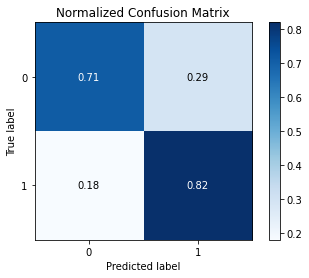

In [ ]:
#matriz de confusão
scikitplot.metrics.plot_confusion_matrix(y_test_val, y_pred_val, normalize=True)

### **3.3 Teste final do Modelo - Métricas de Desempenho Final**

In [ ]:
#teste final
y_pred_final = model.predict(X_test_final)

#relatório das métricas
print(classification_report(y_true = y_test_final, y_pred = y_pred_final))

              precision    recall  f1-score   support

           0       0.88      0.70      0.78       776
           1       0.47      0.73      0.58       281

    accuracy                           0.71      1057
   macro avg       0.68      0.72      0.68      1057
weighted avg       0.77      0.71      0.73      1057



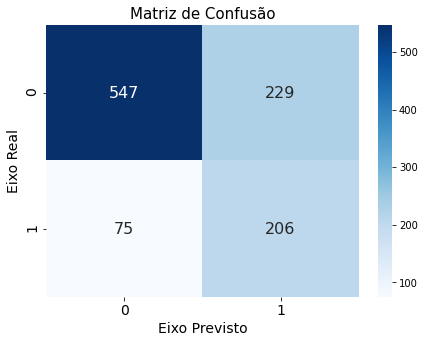

In [ ]:
#Matriz de Confusão 

#Criando figura
fig, ax = plt.subplots(figsize = (7,5))

#Plotando gráfico
sns.heatmap(confusion_matrix(y_true = y_test_final, y_pred = y_pred_final), annot = True, fmt='', cmap = 'Blues', ax = ax,
            annot_kws = {'size':16})

#Mudando nomes dos ticks
ax.set_xticklabels(['0', '1'], fontdict={'fontsize':14})
ax.set_yticklabels(['0', '1'], fontdict={'fontsize':14})

#Atribuindo título
ax.set_title('Matriz de Confusão', fontdict={'fontsize':15})

#Mudando nome do eixo
ax.set_xlabel('Eixo Previsto', fontdict={'fontsize':14})
ax.set_ylabel('Eixo Real', fontdict={'fontsize':14})

#Salvando imagem
fig.savefig('matriz_1', dpi=1200)

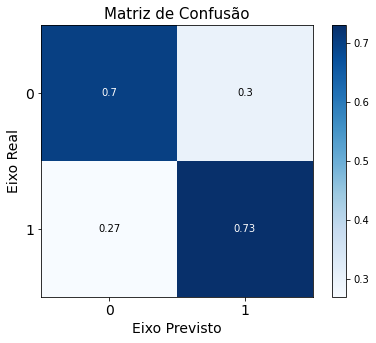

In [ ]:
#matriz de confusão

#Criando figura
fig, ax = plt.subplots(figsize = (7,5))

#Plotando gráfico
scikitplot.metrics.plot_confusion_matrix(y_true = y_test_final, y_pred = y_pred_final, 
                                         normalize = True, ax = ax)

#Mudando nomes dos ticks
ax.set_xticklabels(['0', '1'], fontdict={'fontsize':14})
ax.set_yticklabels(['0', '1'], fontdict={'fontsize':14})

#Atribuindo título
ax.set_title('Matriz de Confusão', fontdict={'fontsize':15})

#Mudando nome do eixo
ax.set_xlabel('Eixo Previsto', fontdict={'fontsize':14})
ax.set_ylabel('Eixo Real', fontdict={'fontsize':14})

#Salvando imagem
fig.savefig('matriz_2', dpi=1200)